In [1]:
import numpy as np

In [2]:
#fully connected layer
class dense_layer():
    def __init__(self, input_size, output_size):
        self.weights = np.random.randn(output_size, input_size)
        self.bias = np.random.randn(output_size, 1)
        
    def forward(self, input):
        self.input = input
        output = np.dot(self.weights, self.input) + self.bias
        return output
    
    def backward(self, output_gradient, learning_rate):
        weights_gradient = np.dot(output_gradient, self.input.T)
        bias_gradient = output_gradient
        input_gradient = np.dot(self.weights.T, output_gradient)
        #update the coefficient
        self.weights -= learning_rate * weights_gradient
        self.bias -= learning_rate * bias_gradient
        return input_gradient

In [3]:
#Activation Function
class tanh_layer():
    def __init__(self):
        self.activation = lambda x : np.tanh(x)
        self.activation_derivative = lambda x : 1 - np.tanh(x) ** 2

    def forward(self, input):
        self.input = input
        output = self.activation(self.input)
        return output
    
    def backward(self, output_gradient,learning_rate):
        next_gradient = np.multiply(output_gradient, self.activation_derivative(self.input))
        return next_gradient

In [4]:
def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))

def mse_derivative(y_true, y_pred):
    return 2 * (y_pred - y_true) / np.size(y_true)

In [5]:
# Generate data for sine function
data_points = 100
X = np.linspace(0, 2 * np.pi, data_points).reshape(-1, 1)
Y = np.sin(X)

epochs = 3000
learning_rate = 0.001
network = [
    dense_layer(1, 10),
    tanh_layer(),
    dense_layer(10, 1),
    tanh_layer()
]
def predict(network, input):
    output = input
    for layer in network:
        output = layer.forward(output)
    return output
# Training loop
for e in range(epochs):
    error = 0
    for i in range(data_points):
        # forward
        output = predict(network, X[i].reshape(-1, 1))

         # backward
        grad = mse_derivative(Y[i], output)
        for layer in reversed(network):
            grad = layer.backward(grad,learning_rate)

        # error
        error += mse(Y[i], output)

    error /= data_points
    if e % 1000 == 0:
        print(f"{e + 1}/{epochs}, error={error}")

1/3000, error=1.4941799117968895
1001/3000, error=0.038479041307847454
2001/3000, error=0.0372914854531167


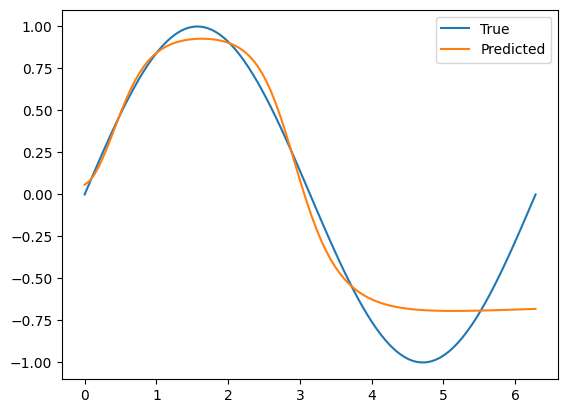

In [6]:
# Plot the results
points = []
for i in range(data_points):
    z = predict(network, X[i].reshape(-1, 1))
    points.append(z[0,0])

points = np.array(points)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.plot(X, Y, label='True')
plt.plot(X, points, label='Predicted')
plt.legend()
plt.show()